# Hackaton Bernas da Street

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn import metrics
import matplotlib.pyplot as plt

import category_encoders as ce


In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
0,202,1413851368636,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
1,9909,1413851725946,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
2,22692,1413851873924,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
3,22938,1413851651534,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
4,29187,1413853025188,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0


# Data Cleaning 101

In [3]:
df.describe()

,id,timestamp,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
count,5.224120e+05,5.224120e+05,522412.000000,522412.000000,522412.000000,522412.000000,522412.000000,522412.000000,522412.000000,522412.000000,522412.000000
mean,1.669530e+07,1.414202e+12,320.588156,52.683499,1660.976921,1.788004,427.071648,43592.443851,72.838093,189.437083,0.105717
std,9.127556e+06,2.084992e+08,28.896147,30.344078,1016.566892,1.366340,517.917622,49633.190195,69.107663,11.654796,0.307476
min,2.020000e+02,1.413850e+12,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,52.960000,0.000000
25%,1.036983e+07,1.414042e+12,320.000000,50.000000,423.000000,0.000000,35.000000,-1.000000,20.000000,191.770000,0.000000
50%,1.417443e+07,1.414132e+12,320.000000,50.000000,2227.000000,3.000000,163.000000,-1.000000,48.000000,191.770000,0.000000
75%,2.540063e+07,1.414412e+12,320.000000,50.000000,2506.000000,3.000000,687.000000,100083.000000,95.000000,191.770000,0.000000
max,3.237738e+07,1.414541e+12,1024.000000,1024.000000,2688.000000,3.000000,1839.000000,100248.000000,221.000000,229.450000,1.000000


In [4]:
df.isnull().sum()

id                    0
timestamp             0
product_id            0
product_department    0
product_category      0
card_id               0
user_id               0
C15                   0
C16                   0
C17                   0
C18                   0
C19                   0
C20                   0
C21                   0
amount                0
isfraud               0
dtype: int64

In [5]:
df.nunique()

id                    522412
timestamp             521650
product_id              1959
product_department      1251
product_category           4
card_id                 1668
user_id                82591
C15                        8
C16                        9
C17                      293
C18                        4
C19                       56
C20                      157
C21                       50
amount                  1187
isfraud                    2
dtype: int64

In [6]:
df.card_id.value_counts()

f53417e1    162255
ecad2386     63340
7358e05e     25178
d292c32f     20410
e2fcccd2     18810
3692fd30     13678
03a08c3f      9405
54c5d545      9057
5064623a      8635
e71aba61      7813
73206397      6930
e2a1ca37      6906
03528b27      6630
06ef0828      6510
66f5e02e      4436
6a7bc718      4409
f888bf4c      4270
be7c618d      4248
39947756      4078
460f4063      3816
c0c5eb49      3557
4e02fbd3      3529
c680d3dd      3350
422da614      3333
1dc72b4d      2805
170f5944      2798
2bc6bb64      2717
fb7c70a3      2242
75759a0b      2217
1d64ced5      2187
             ...  
976a33c7         1
1c9b2dd5         1
8d6c6b56         1
3ea6f0a7         1
a45f45b7         1
418d4b4b         1
1265ba77         1
7d79a0b1         1
c57b52d6         1
fa17c1ef         1
a5dc9a71         1
34c41859         1
dfd777fc         1
fac33b89         1
a3f358d9         1
39433cc3         1
c542150c         1
9d0a3106         1
665851e6         1
67711658         1
2434b80a         1
37028fa7    

In [7]:
df = df.drop("id", axis=1)

In [8]:
df.head()

,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
0,1413851368636,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
1,1413851725946,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
2,1413851873924,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
3,1413851651534,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
4,1413853025188,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0


## Card id investigation

## Sort timestamp and split test/train

In [9]:
df = df.sort_values(by = "timestamp").reset_index(drop = True)
df.head()

,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
0,1413849604595,c4e18dd6,85f751fd,50e219e0,92e72531,a99f214a,320,50,2480,3,297,100111,61,191.77,0
1,1413849611766,c4e18dd6,85f751fd,50e219e0,e71aba61,a99f214a,320,50,1722,0,35,-1,79,191.77,1
2,1413849613367,dd7026ee,15d93b0b,50e219e0,ecad2386,5c7c1b02,320,50,2495,2,167,100173,23,227.63,0
3,1413849619068,c4e18dd6,85f751fd,50e219e0,5e3f096f,ba2d210a,320,50,2161,0,35,100051,157,191.77,0
4,1413849625209,c4e18dd6,85f751fd,50e219e0,39947756,0ddad6d9,320,50,1955,3,163,100192,71,191.77,0


In [10]:
len(df)

522412

In [11]:
len(df.iloc[0:int(0.8*len(df))])

417929

In [12]:
len(df.iloc[int(0.8*len(df)):])

104483

In [13]:
df_train = df.iloc[0:int(0.8*len(df))].copy()
df_test = df.iloc[int(0.8*len(df)):].copy()
x_train = df_train.drop("isfraud",axis=1)
y_train = df_train[["isfraud"]]
x_test = df_test.drop("isfraud",axis=1)
y_test = df_test[["isfraud"]]

In [20]:
# initialize transformer with desired options
ordinalencoder = ce.ordinal.OrdinalEncoder()
# fit transformer to data
ordinalencoder.fit(x_train)
# create new feature by transforming the datab
x_train = ordinalencoder.transform(x_train)
x_test = ordinalencoder.transform(x_test)

# Baseline Basic Model for Dummies

In [21]:
x_train

,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount
0,1413849604595,1,1,1,1,1,320,50,2480,3,297,100111,61,191.77
1,1413849611766,1,1,1,2,1,320,50,1722,0,35,-1,79,191.77
2,1413849613367,2,2,1,3,2,320,50,2495,2,167,100173,23,227.63
3,1413849619068,1,1,1,4,3,320,50,2161,0,35,100051,157,191.77
4,1413849625209,1,1,1,5,4,320,50,1955,3,163,100192,71,191.77
5,1413849628516,1,1,1,6,5,320,50,2493,3,35,-1,117,191.77
6,1413849628608,1,1,1,7,6,320,50,2161,0,35,-1,157,191.77
7,1413849633950,1,1,1,8,7,320,50,196,3,303,-1,15,191.77
8,1413849639453,1,1,1,9,8,320,50,2493,3,35,100050,117,191.77
9,1413849648449,1,1,1,10,9,320,50,2480,3,297,100111,61,191.77


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={0:0.9,1:0.1})
lr.fit(x_train, y_train)

C:\Users\Francisco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Francisco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight={0: 0.9, 1: 0.1}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predicted_proba_logistic = lr.predict_proba(x_train)[:,1]
predicted_proba_logistic

array([0.01359044, 0.01359044, 0.01359044, ..., 0.01356526, 0.01356526,
       0.01356526])

In [27]:
y_pred_train = lr.predict(x_train)

In [28]:
y_pred_test = lr.predict(x_test)

In [33]:
roc_auc_logistic = metrics.roc_auc_score(y_train,lr.predict_proba(x_train)[:,1])
roc_auc_logistic

0.5101250361137177

In [31]:
lr.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

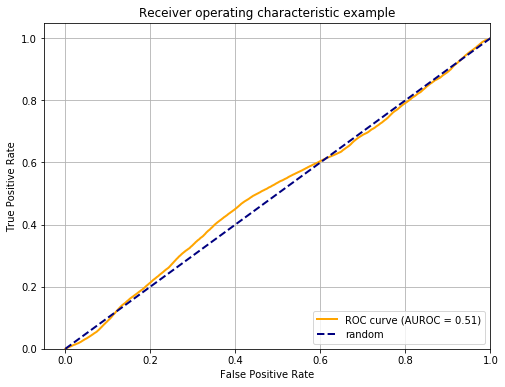

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_score=predicted_proba_logistic, y_true=y_train.isfraud)
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Note: this is ALL just matplotlib stuff, nothing scientific about it! 
    
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(roc_auc_logistic, fpr, tpr)

## Random Forest

# 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(x_train, y_train)

In [ ]:
feature_importances = pd.Series(data=clf.feature_importances_, index=X_.columns)
feature_importances.sort_values(ascending=False)